In [8]:
import os
base_dir = '/Users/norikaisa/Downloads/Book'
train_dir = os.path.join(base_dir, 'unnoisy train') 
train_normal_dir = os.path.join(train_dir, 'normal')
train_abnormal_dir = os.path.join(train_dir, 'abnormal')
validation_dir = os.path.join(base_dir, 'unnoisy validation') 
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_abnormal_dir = os.path.join(validation_dir, 'abnormal')
test_dir = os.path.join(base_dir, 'unnoisy test') 
test_normal_dir = os.path.join(test_dir, 'normal')
test_abnormal_dir = os.path.join(test_dir, 'abnormal')

print('total training normal images:', len(os.listdir(train_normal_dir))) 
print('total training abnormal images:', len(os.listdir(train_abnormal_dir))) 

total training normal images: 4099
total training abnormal images: 2815


In [9]:
import shutil
import random
for x in range(409):
    files = [file for file in os.listdir(train_normal_dir) if os.path.isfile(os.path.join(train_normal_dir, file))]
    file = random.choice(files)
    shutil.move(os.path.join(train_normal_dir, file), validation_normal_dir)
    
for x in range(281):
    files = [file for file in os.listdir(train_abnormal_dir) if os.path.isfile(os.path.join(train_abnormal_dir, file))]
    file = random.choice(files)
    shutil.move(os.path.join(train_abnormal_dir, file), validation_abnormal_dir)

for x in range(409):
    files = [file for file in os.listdir(train_normal_dir) if os.path.isfile(os.path.join(train_normal_dir, file))]
    file = random.choice(files)
    shutil.move(os.path.join(train_normal_dir, file), test_normal_dir)
    
for x in range(281):
    files = [file for file in os.listdir(train_abnormal_dir) if os.path.isfile(os.path.join(train_abnormal_dir, file))]
    file = random.choice(files)
    shutil.move(os.path.join(train_abnormal_dir, file), test_abnormal_dir)

In [59]:
import cv2
import glob
import numpy as np

X_train = []
files = glob.glob ("/Users/norikaisa/Downloads/Book/unnoisy train/normal/*.png")
for myFile in files:
    image = cv2.imread (myFile)
    X_train.append (image)

print('X_train shape:', np.array(X_train).shape)

X_train shape: (3280, 30, 50, 3)


In [60]:
X_validation = []
files = glob.glob ("/Users/norikaisa/Downloads/Book/unnoisy validation/normal/*.png")
for myFile in files:
    image = cv2.imread (myFile)
    X_validation.append (image)

print('X_validation shape:', np.array(X_validation).shape)

X_validation shape: (409, 30, 50, 3)


In [68]:
X_test = []
files = glob.glob ("/Users/norikaisa/Downloads/Book/unnoisy test/normal/*.png")
for myFile in files:
    image = cv2.imread (myFile)
    X_test.append (image)

files = glob.glob ("/Users/norikaisa/Downloads/Book/unnoisy test/abnormal/*.png")
for myFile in files:
    image = cv2.imread (myFile)
    X_test.append (image)

print('X_test shape:', np.array(X_test).shape)

X_test shape: (690, 30, 50, 3)


In [43]:
height, width, depth = 30, 50, 3
X_train = np.array(X_train)
X_train = X_train.reshape(3280, height * width * depth)
X_train = X_train.astype('float32')
X_train /= 255
X_validation = np.array(X_validation)
X_validation = X_validation.reshape(409, height * width * depth)
X_validation = X_validation.astype('float32')
X_validation /= 255
X_test = np.array(X_test)
X_test = X_test.reshape(690, height * width * depth)
X_test = X_test.astype('float32')
X_test /= 255

In [44]:
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 

In [52]:
input_img = Input(shape=(height * width * depth,))

x = Dense(height * width * depth, activation='relu')(input_img)
encoded = Dense(height * width * depth//2, activation='relu')(x)
encoded = Dense(height * width * depth//8, activation='relu')(encoded)
encoded = Dense(height * width * depth//256, activation='relu')(encoded)

decoded = Dense(height * width * depth//8, activation='relu')(encoded)
decoded = Dense(height * width * depth//2, activation='relu')(decoded)
decoded = Dense(height * width * depth, activation='sigmoid')(decoded)

model = Model(input_img, decoded)

In [66]:
model.compile(optimizer='adadelta', loss='mse')

model.fit(X_train, X_train,
      epochs=10,
      batch_size=328,
      validation_data=(X_validation, X_validation))

Train on 3280 samples, validate on 409 samples
Epoch 1/10
3280/3280 [==============================] - 4s 1ms/step - loss: 0.0019 - val_loss: 0.8835
Epoch 2/10
3280/3280 [==============================] - 4s 1ms/step - loss: 0.0014 - val_loss: 0.8839
Epoch 3/10
3280/3280 [==============================] - 4s 1ms/step - loss: 0.0011 - val_loss: 0.8841
Epoch 4/10
3280/3280 [==============================] - 4s 1ms/step - loss: 8.8783e-04 - val_loss: 0.8842
Epoch 5/10
3280/3280 [==============================] - 4s 1ms/step - loss: 7.4487e-04 - val_loss: 0.8844
Epoch 6/10
3280/3280 [==============================] - 4s 1ms/step - loss: 6.3731e-04 - val_loss: 0.8845
Epoch 7/10
3280/3280 [==============================] - 4s 1ms/step - loss: 5.5353e-04 - val_loss: 0.8845
Epoch 8/10
3280/3280 [==============================] - 4s 1ms/step - loss: 4.8646e-04 - val_loss: 0.8846
Epoch 9/10
3280/3280 [==============================] - 4s 1ms/step - loss: 4.3157e-04 - val_loss: 0.8846
Epoch 10/10

In [70]:
predictions = model.predict(X_test)
mse = np.mean(np.power(predictions - X_test, 2), axis=1)
Y_test = np.zeros((690,), dtype=np.uint8)
Y_test[:409] = 1

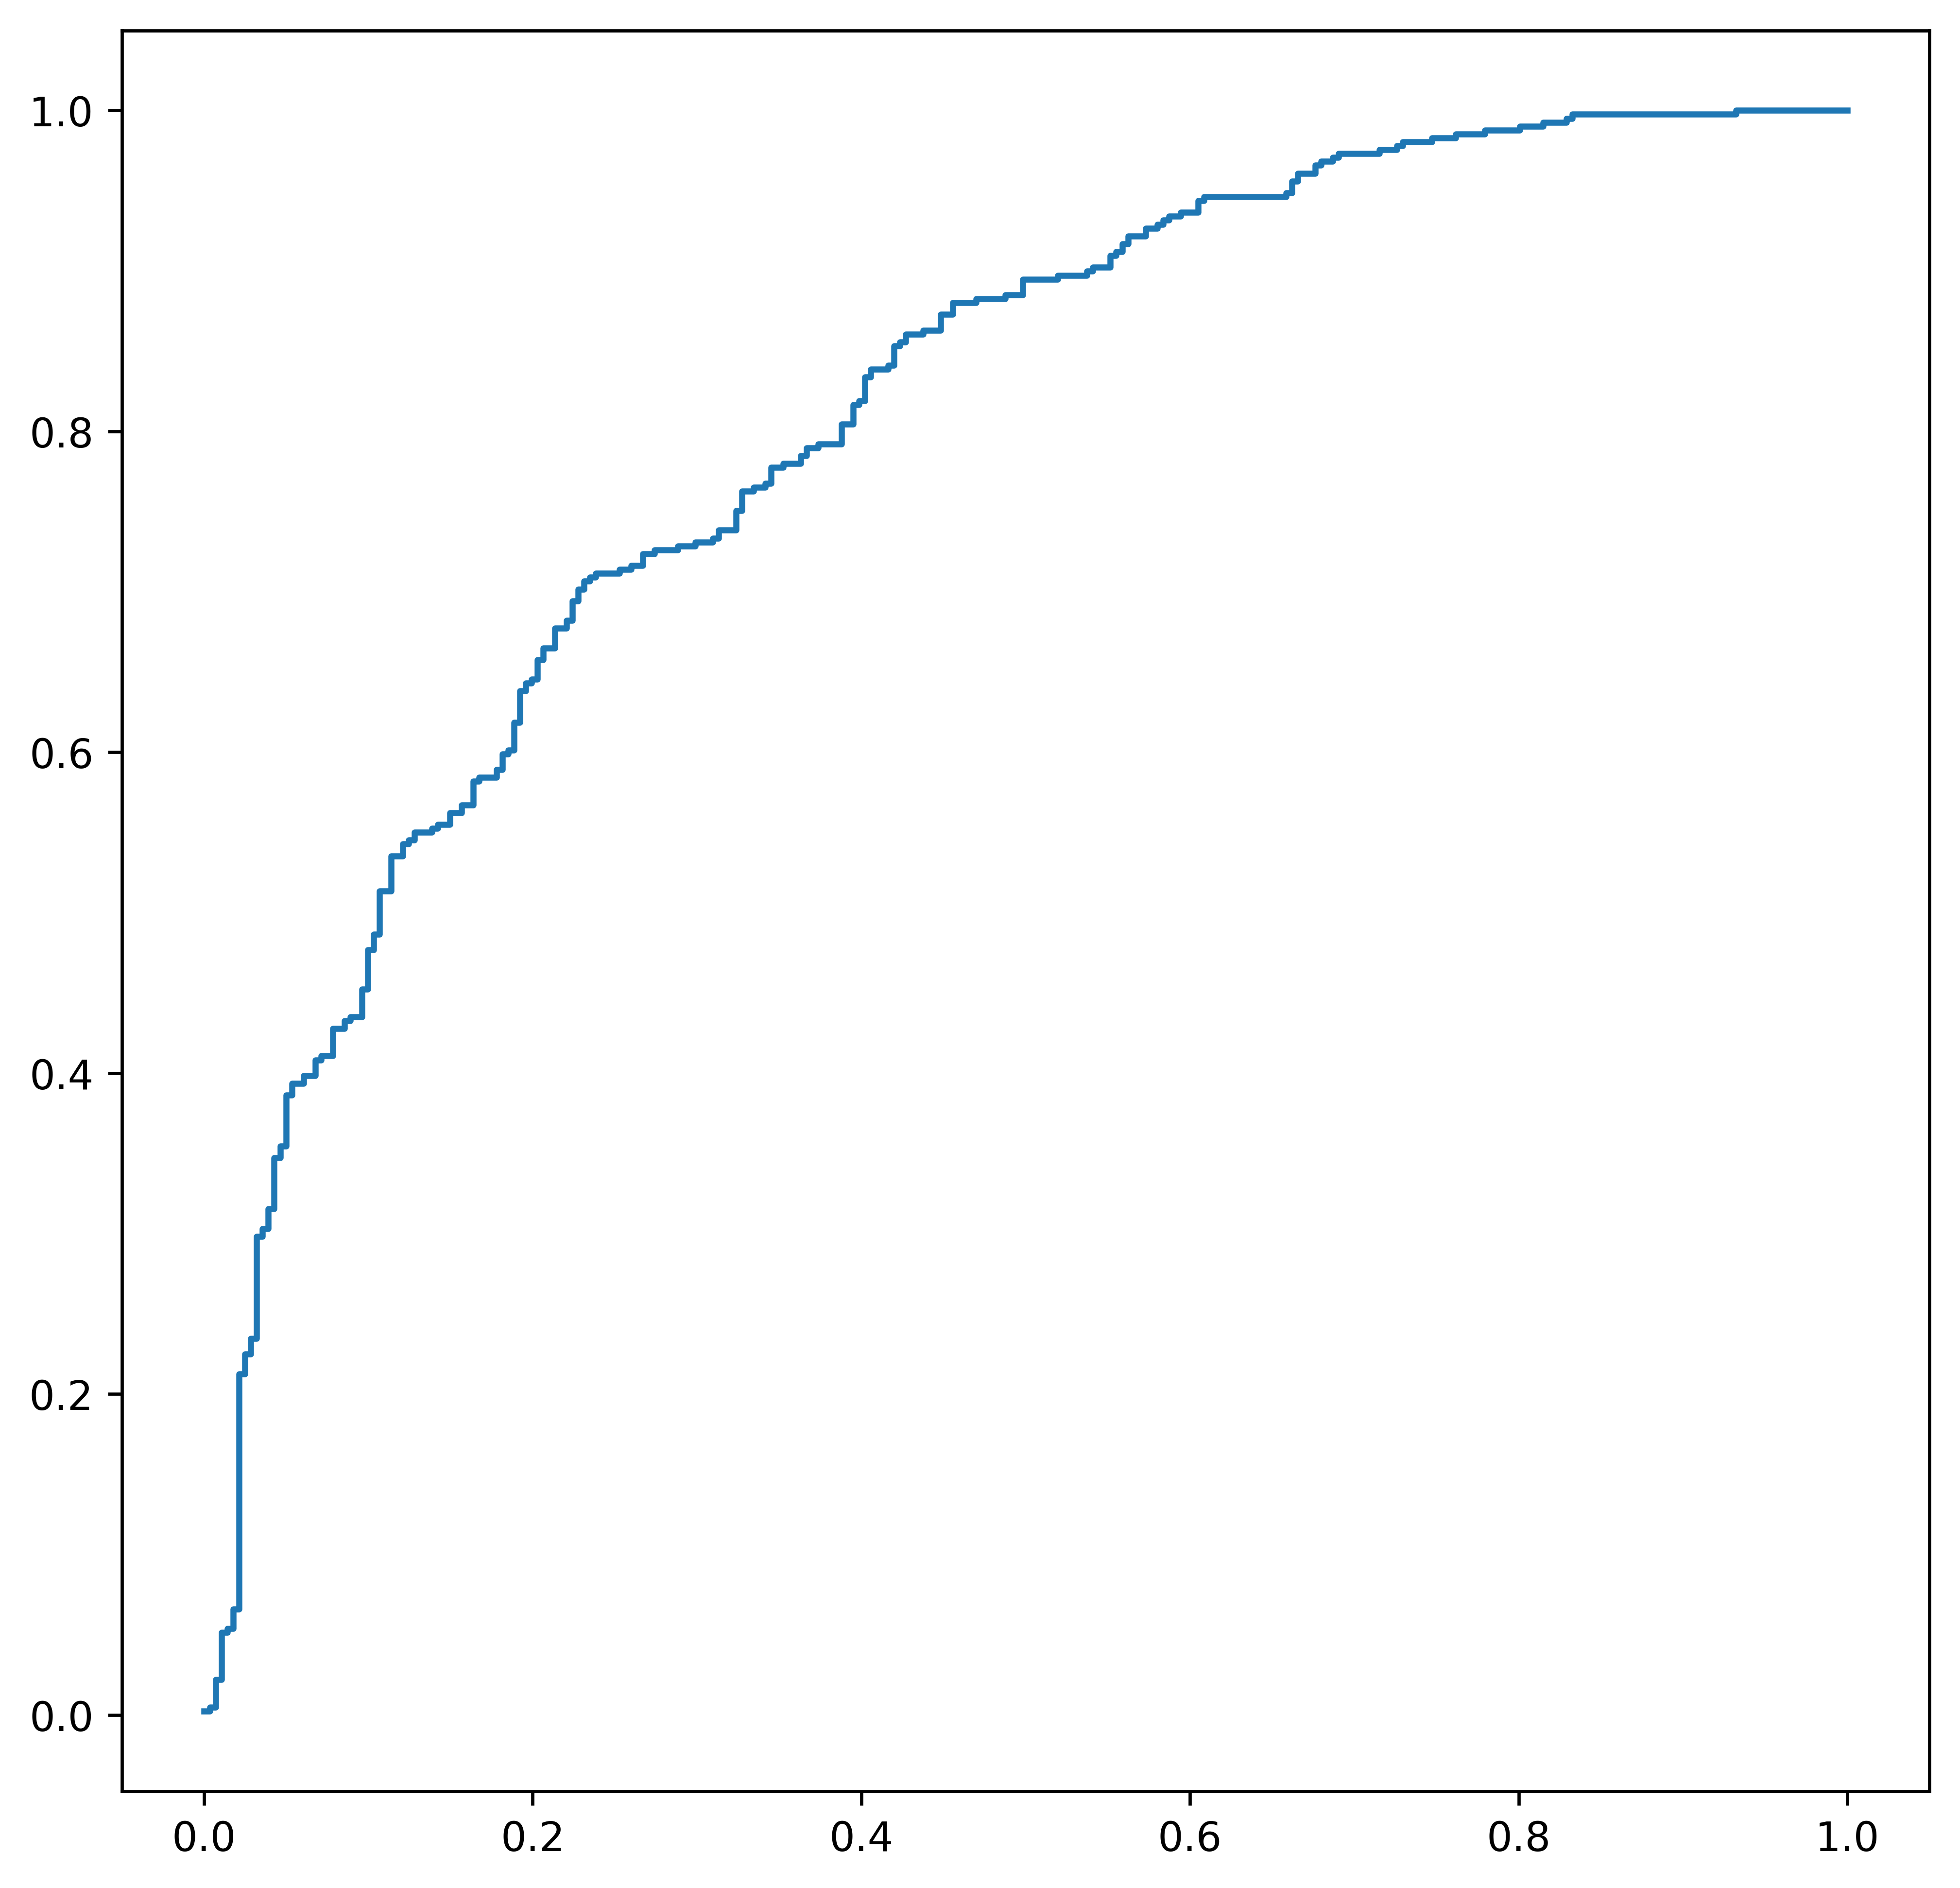

AUC: 0.8044096790192206


In [55]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, threshold = metrics.roc_curve(Y_test, mse)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(8,8), dpi = 600)
plt.plot(fpr,tpr)
plt.show()
print('AUC:', roc_auc)

In [64]:
X_train = np.array(X_train)
X_train = X_train.astype('float32')
X_train /= 255
X_validation = np.array(X_validation)
X_validation = X_validation.astype('float32')
X_validation /= 255

from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
input_img = Input(shape=(30, 50, 3))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)

decoded = UpSampling2D((2, 2))(encoded)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)

model = Model(input_img, decoded)


In [69]:
X_test = np.array(X_test)
X_test = X_test.astype('float32')
X_test /= 255